In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]='2'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, accuracy_score

import sys
sys.path.append('/home/bis/2021_SJH_detectability/DbyDeep')
from RefModel.model_DeepMSpeptide import load_pep_and_codify

In [2]:
print('Loading model...')
model_2_1D = keras.models.load_model('/home/bis/2021_SJH_detectability/DbyDeep/log/model_DeepMspeptide.h5')
# retrained

Loading model...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
df_massive=pd.read_csv('/data/2021_SJH_detectability/data_human/train.csv')
df_merge=pd.DataFrame(df_massive.peptide.unique(), columns=['peptide'])
df_merge['Drop']=True
df_hpp=pd.read_csv('/data/2021_SJH_detectability/data_human/HPP.csv')

# Cross species : Mouse

Loading input peptides
Succesfully loaded 1299325 peptides and skipped 0
1299325/1299325 [==============================] - 107s 83us/sample - loss: 0.6805 - acc: 0.6829 - binary_crossentropy: 0.6805
Test Accuracy: [0.6805322977710875, 0.68289226, 0.6805326]
Test AUC : 0.9058734006055039
              precision    recall  f1-score   support

       False     0.9971    0.6719    0.8028   1248307
        True     0.1060    0.9520    0.1908     51018

    accuracy                         0.6829   1299325
   macro avg     0.5516    0.8120    0.4968   1299325
weighted avg     0.9621    0.6829    0.7788   1299325



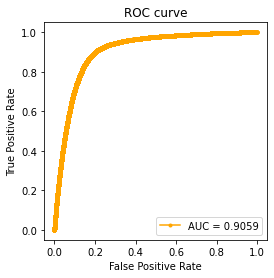

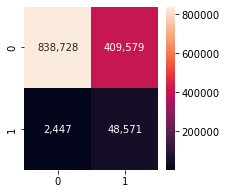

In [5]:
df_test = pd.concat([
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/mouse/KLife/train.csv'),
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/mouse/KLife/test.csv'),
])
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)
df_test=df_test[['peptide', 'label']]#.drop_duplicates()

df_test = df_test[df_test.peptide.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.peptide.apply(lambda x: 'Z' not in x)].reset_index(drop=True)

print('Loading input peptides')
file = df_test.peptide.values
X_test, skipped,  lines = load_pep_and_codify(file, 81)
y_test = df_test.label.values
print('Succesfully loaded {0} peptides and skipped {1}'.format(len(lines), str(skipped)))

probs = model_2_1D.predict(X_test)
# probs = 1-probs
y_pred = [1 if i>=0.5 else 0 for i in probs]
acc = model_2_1D.evaluate(X_test, y_test)

auc = roc_auc_score(y_test, probs)
print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_mouse_KLife_DeepMSpeptide_fpr.npy', fpr)
np.save('log/result_mouse_KLife_DeepMSpeptide_tpr.npy', tpr)
np.save('log/result_mouse_KLife_DeepMSpeptide_threshold.npy', threshold)
np.save('log/result_mouse_KLife_DeepMSpeptide_prob.npy', probs)
np.save('log/result_mouse_KLife_DeepMSpeptide_true.npy', y_test)

Loading input peptides
Succesfully loaded 1131887 peptides and skipped 0
1131887/1131887 [==============================] - 114s 101us/sample - loss: 0.6933 - acc: 0.6810 - binary_crossentropy: 0.6933
Test Accuracy: [0.6932999154787987, 0.6810079, 0.69330245]
Test AUC : 0.8795061999763901
              precision    recall  f1-score   support

       False     0.9954    0.6704    0.8012   1085326
        True     0.1078    0.9279    0.1931     46561

    accuracy                         0.6810   1131887
   macro avg     0.5516    0.7991    0.4972   1131887
weighted avg     0.9589    0.6810    0.7762   1131887



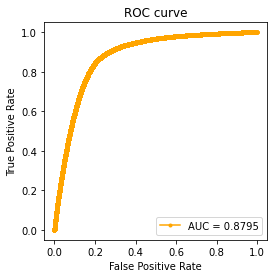

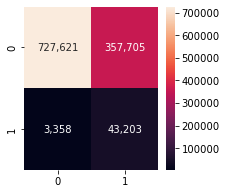

In [6]:
df_test = pd.concat([
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/mouse/SkeletaMuscle/train.csv'),
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/mouse/SkeletaMuscle/test.csv'),
])
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)
df_test=df_test[['peptide', 'label']]#.drop_duplicates()

df_test = df_test[df_test.peptide.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.peptide.apply(lambda x: 'Z' not in x)].reset_index(drop=True)

print('Loading input peptides')
file = df_test.peptide.values
X_test, skipped,  lines = load_pep_and_codify(file, 81)
y_test = df_test.label.values
print('Succesfully loaded {0} peptides and skipped {1}'.format(len(lines), str(skipped)))

probs = model_2_1D.predict(X_test)
# probs = 1-probs
y_pred = [1 if i>=0.5 else 0 for i in probs]
acc = model_2_1D.evaluate(X_test, y_test)

auc = roc_auc_score(y_test, probs)
print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_mouse_SkeletaMuscle_DeepMSpeptide_fpr.npy', fpr)
np.save('log/result_mouse_SkeletaMuscle_DeepMSpeptide_tpr.npy', tpr)
np.save('log/result_mouse_SkeletaMuscle_DeepMSpeptide_threshold.npy', threshold)
np.save('log/result_mouse_SkeletaMuscle_DeepMSpeptide_prob.npy', probs)
np.save('log/result_mouse_SkeletaMuscle_DeepMSpeptide_true.npy', y_test)

# Cross species : Human

Loading input peptides
Succesfully loaded 1415310 peptides and skipped 0
Test AUC : 0.8667013533628883
              precision    recall  f1-score   support

       False     0.9939    0.7023    0.8230   1363829
        True     0.1009    0.8850    0.1811     51481

    accuracy                         0.7090   1415310
   macro avg     0.5474    0.7937    0.5021   1415310
weighted avg     0.9614    0.7090    0.7997   1415310



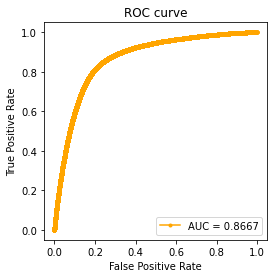

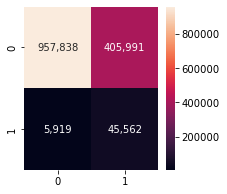

In [7]:
df_test = pd.concat([
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/human/HEK293/train.csv'),
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/human/HEK293/test.csv'),
])
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)
df_test=df_test[['peptide', 'label']]#.drop_duplicates()

print('Loading input peptides')
file = df_test.peptide.values
X_test, skipped,  lines = load_pep_and_codify(file, 81)
y_test = df_test.label.values
print('Succesfully loaded {0} peptides and skipped {1}'.format(len(lines), str(skipped)))

probs = model_2_1D.predict(X_test)
# probs = 1-probs
y_pred = [1 if i >= 0.5 else 0 for i in probs]
# acc = model_2_1D.evaluate(X_test, y_test)

auc = roc_auc_score(y_test, probs)
# print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_human_HEK293_DeepMSpeptide_fpr.npy', fpr)
np.save('log/result_human_HEK293_DeepMSpeptide_tpr.npy', tpr)
np.save('log/result_human_HEK293_DeepMSpeptide_threshold.npy', threshold)
np.save('log/result_human_HEK293_DeepMSpeptide_prob.npy', probs)
np.save('log/result_human_HEK293_DeepMSpeptide_true.npy', y_test)

Loading input peptides
Succesfully loaded 1023741 peptides and skipped 0
Test AUC : 0.832824592067517
              precision    recall  f1-score   support

       False     0.9949    0.6947    0.8181   1003490
        True     0.0516    0.8231    0.0971     20251

    accuracy                         0.6972   1023741
   macro avg     0.5232    0.7589    0.4576   1023741
weighted avg     0.9762    0.6972    0.8038   1023741



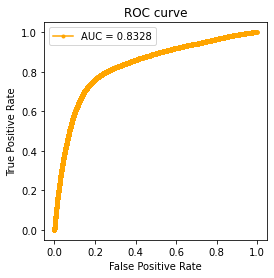

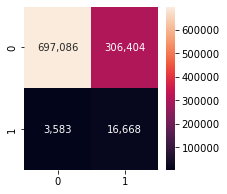

In [8]:
df_test = pd.concat([
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/human/HmapLiver/train.csv'),
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/human/HmapLiver/test.csv'),
])
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)
df_test=df_test[['peptide', 'label']]#.drop_duplicates()

print('Loading input peptides')
file = df_test.peptide.values
X_test, skipped,  lines = load_pep_and_codify(file, 81)
y_test = df_test.label.values
print('Succesfully loaded {0} peptides and skipped {1}'.format(len(lines), str(skipped)))

probs = model_2_1D.predict(X_test)
# probs = 1-probs
y_pred = [1 if i >= 0.5 else 0 for i in probs]
# acc = model_2_1D.evaluate(X_test, y_test)

auc = roc_auc_score(y_test, probs)
# print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_human_HmapLiver_DeepMSpeptide_fpr.npy', fpr)
np.save('log/result_human_HmapLiver_DeepMSpeptide_tpr.npy', tpr)
np.save('log/result_human_HmapLiver_DeepMSpeptide_threshold.npy', threshold)
np.save('log/result_human_HmapLiver_DeepMSpeptide_prob.npy', probs)
np.save('log/result_human_HmapLiver_DeepMSpeptide_true.npy', y_test)

# Yeast

Loading input peptides
Succesfully loaded 553792 peptides and skipped 0
553792/553792 [==============================] - 78s 141us/sample - loss: 0.7640 - acc: 0.6559 - binary_crossentropy: 0.7639
Test Accuracy: [0.7639502766286516, 0.65585995, 0.7639499]
Test AUC : 0.8522949203488934
              precision    recall  f1-score   support

       False     0.9911    0.6398    0.7776    520820
        True     0.1377    0.9088    0.2392     32972

    accuracy                         0.6559    553792
   macro avg     0.5644    0.7743    0.5084    553792
weighted avg     0.9403    0.6559    0.7456    553792



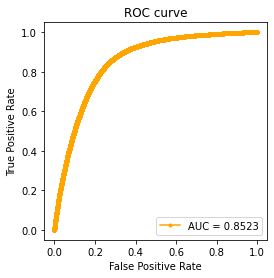

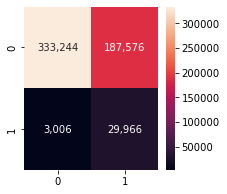

In [9]:
df_test = pd.concat([
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/yeast/DelPBP1/train.csv'),
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/yeast/DelPBP1/test.csv'),
])
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)
df_test=df_test[['peptide', 'label']]#.drop_duplicates()

print('Loading input peptides')
file = df_test.peptide.values
X_test, skipped,  lines = load_pep_and_codify(file, 81)
y_test = df_test.label.values
print('Succesfully loaded {0} peptides and skipped {1}'.format(len(lines), str(skipped)))

probs = model_2_1D.predict(X_test)
# probs = 1-probs
y_pred = [1 if i>=0.5 else 0 for i in probs]
acc = model_2_1D.evaluate(X_test, y_test)

auc = roc_auc_score(y_test, probs)
print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_yeast_DelPBP1_DeepMSpeptide_fpr.npy', fpr)
np.save('log/result_yeast_DelPBP1_DeepMSpeptide_tpr.npy', tpr)
np.save('log/result_yeast_DelPBP1_DeepMSpeptide_threshold.npy', threshold)
np.save('log/result_yeast_DelPBP1_DeepMSpeptide_prob.npy', probs)
np.save('log/result_yeast_DelPBP1_DeepMSpeptide_true.npy', y_test)

Loading input peptides
Succesfully loaded 639938 peptides and skipped 0
639938/639938 [==============================] - 89s 140us/sample - loss: 0.5936 - acc: 0.7168 - binary_crossentropy: 0.5936
Test Accuracy: [0.59356744318874, 0.716846, 0.5935674]
Test AUC : 0.9073123459716476
              precision    recall  f1-score   support

       False     0.9871    0.6864    0.8097    561782
        True     0.2933    0.9358    0.4467     78156

    accuracy                         0.7168    639938
   macro avg     0.6402    0.8111    0.6282    639938
weighted avg     0.9024    0.7168    0.7654    639938



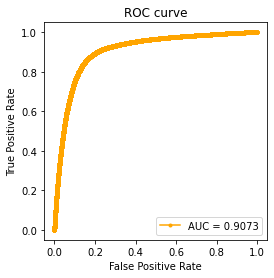

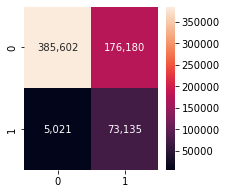

In [10]:
df_test = pd.concat([
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/yeast/KLife/train.csv'),
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/yeast/KLife/test.csv'),
])
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)
df_test=df_test[['peptide', 'label']]#.drop_duplicates()

print('Loading input peptides')
file = df_test.peptide.values
X_test, skipped,  lines = load_pep_and_codify(file, 81)
y_test = df_test.label.values
print('Succesfully loaded {0} peptides and skipped {1}'.format(len(lines), str(skipped)))

probs = model_2_1D.predict(X_test)
# probs = 1-probs
y_pred = [1 if i>=0.5 else 0 for i in probs]
acc = model_2_1D.evaluate(X_test, y_test)

auc = roc_auc_score(y_test, probs)
print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_yeast_KLife_DeepMSpeptide_fpr.npy', fpr)
np.save('log/result_yeast_KLife_DeepMSpeptide_tpr.npy', tpr)
np.save('log/result_yeast_KLife_DeepMSpeptide_threshold.npy', threshold)
np.save('log/result_yeast_KLife_DeepMSpeptide_prob.npy', probs)
np.save('log/result_yeast_KLife_DeepMSpeptide_true.npy', y_test)